In [2]:
import pandas as pd 
df = pd.read_csv("pokemon.csv",encoding="ANSI") #because by default 

In [7]:
df.head()

,#,NAME_ENGLISH,NAME_GERMAN,NAME_FRENCH,NAME_JAPAN,NAME_KOREAN,TYP1,TYP2,GENERATION,CANDY,BUDDY_DISTANCE,MAX_HP,MAX_ATT,MAX_DEF,MAX_CP,CATCH_RATE,ESCAPE_RATE,SHINY,ICON_PATH,SPRITE_PATH
0,1,Bulbasaur,Bisasam,Bulbizarre,Fushigidane,Isanghaessi,Grass,Poison,1.0,25.0,3.0,128.0,118.0,111.0,1115.0,"20,00 %","10,00 %",Yes,./icon/001.png,./sprites/001.png
1,2,Ivysaur,Bisaknosp,Herbizarre,Fushigisou,Isanghaepul,Grass,Poison,1.0,100.0,3.0,155.0,151.0,143.0,1699.0,"10,00 %","7,00 %",Yes,./icon/002.png,./sprites/002.png
2,3,Venusaur,Bisaflor,Florizarre,Fushigibana,Isanghaekkot,Grass,Poison,1.0,NaN,3.0,190.0,198.0,189.0,2720.0,"5,00 %","5,00 %",Yes,./icon/003.png,./sprites/003.png
3,4,Charmander,Glumanda,Salamèche,Hitokage,Pairi,Fire,NaN,1.0,25.0,3.0,118.0,116.0,93.0,980.0,"20,00 %","10,00 %",Yes,./icon/004.png,./sprites/004.png
4,5,Charmeleon,Glutexo,Reptincel,Lizardo,Rijadeu,Fire,NaN,1.0,100.0,3.0,151.0,158.0,126.0,1653.0,"10,00 %","7,00 %",Yes,./icon/005.png,./sprites/005.png


In [9]:
len(df['TYP1'].value_counts()) #because using len will allow not having repeated values

18

In [20]:
len(df['TYP2'].value_counts())

18

In [32]:
df['TYP2'].value_counts() #as it is possible to see without let we have all the type options

Flying      97
Ground      33
Poison      32
Psychic     30
Fairy       30
Steel       28
Fighting    25
Grass       20
Dragon      20
Dark        19
Water       18
Ghost       17
Rock        14
Fire        12
Ice         12
Electric    11
Normal       6
Bug          5
Name: TYP2, dtype: int64

In [33]:
#Create an explanatory model that the "target" is the "Max Power of Combat"
from sklearn.linear_model import LinearRegression
XY = df[['MAX_CP','MAX_HP','MAX_ATT','MAX_DEF']]
XY.dtypes
XY=XY.dropna()

In [34]:
Y = XY['MAX_CP']
X = XY[['MAX_HP','MAX_ATT','MAX_DEF']]

lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
lm.coef_

array([ 4.64031022, 10.43250854,  5.26935569])

In [36]:
lm.score(X,Y)

0.9649749015950121

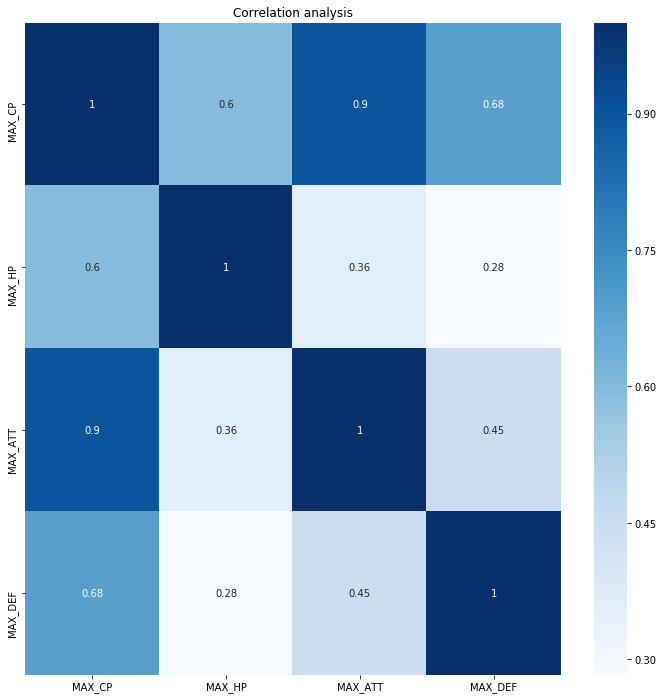

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[12, 12])
corr_mtx = XY.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

#temos duas variáveis independes pouco correlacionadas entre si e é bom

In [38]:
df.dtypes

#                  object
NAME_ENGLISH       object
NAME_GERMAN        object
NAME_FRENCH        object
NAME_JAPAN         object
NAME_KOREAN        object
TYP1               object
TYP2               object
GENERATION        float64
CANDY             float64
BUDDY_DISTANCE    float64
MAX_HP            float64
MAX_ATT           float64
MAX_DEF           float64
MAX_CP            float64
CATCH_RATE         object
ESCAPE_RATE        object
SHINY              object
ICON_PATH          object
SPRITE_PATH        object
dtype: object

In [39]:
XY = df[['MAX_CP','MAX_HP','CANDY','MAX_DEF']]
XY.dtypes
XY=XY.dropna()

#I changed the max_att and i introduced the variable candy in order to make conclusions about the new regression

In [40]:
Y = XY['MAX_CP']
X = XY[['MAX_HP','CANDY','MAX_DEF']]

lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
lm.coef_

array([4.00272451, 0.75323533, 7.61569308])

In [42]:
lm.score(X,Y)

0.5192415427003362

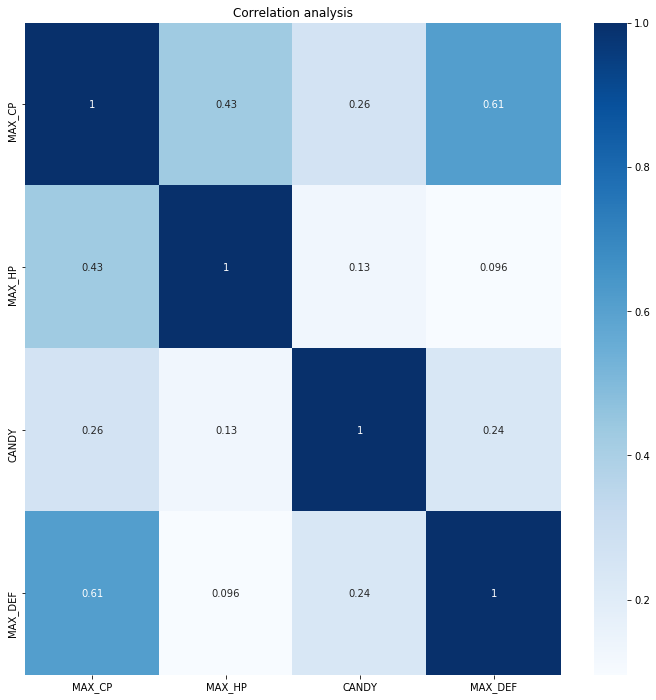

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[12, 12])
corr_mtx = XY.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

#The correlation between the candy and the max_hp is really low but that is not necessarily bad